Content

This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things.

Context

Reservation cancellation is not uncommon in the hotel industry. Each cancellation means a lost revenue opportunity that can never be recovered. When working at the front desk at an airport hotel, we had to call each guest to confirm if they will show up in the afternoon. If they confirm that they cannot show up, we could try to sell the room again. This practice ensures the revenue to a certain degree. However, it is not sufficient to call each guest in the afternoon since a majority of guests check-in during the afternoon.

Therefore, if we can predict if a guest would cancel a reservation, hotels could contact guests that most likely to cancel to confirm more efficiency and to resell the room to optimize revenues.

Questions

Which hotel has more cancelations?

Any difference in lead time?

How about ADR?

Would Deposit Type makes a difference?

Any difference in market segments?

How about distribution channels?

How about Month, Day, and Week Number?

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 


In [5]:
df = pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [7]:
# check for missing values
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

There are many missing values in agent & company columns. These two columns can be dropped. We can drop the missing value in country & children since there is only small proportion missing values.

In [8]:
#check for the shape of dataset
df.shape

(119390, 32)

In [10]:
# check for data type of each column
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [15]:
df['is_canceled'].value_counts(normalize=True )

0    0.629584
1    0.370416
Name: is_canceled, dtype: float64

In [16]:
df['reservation_status'].value_counts(normalize=True)

Check-Out    0.629584
Canceled     0.360307
No-Show      0.010110
Name: reservation_status, dtype: float64

is_canceled & reservation_status provide same information, we can drop reservation_status for model building purpose

In [23]:
df.drop(columns=['agent', 'company', 'reservation_status'],inplace=True)
df.dropna(axis=0,inplace=True)
df.shape

KeyError: "['agent' 'company' 'reservation_status'] not found in axis"

In [24]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

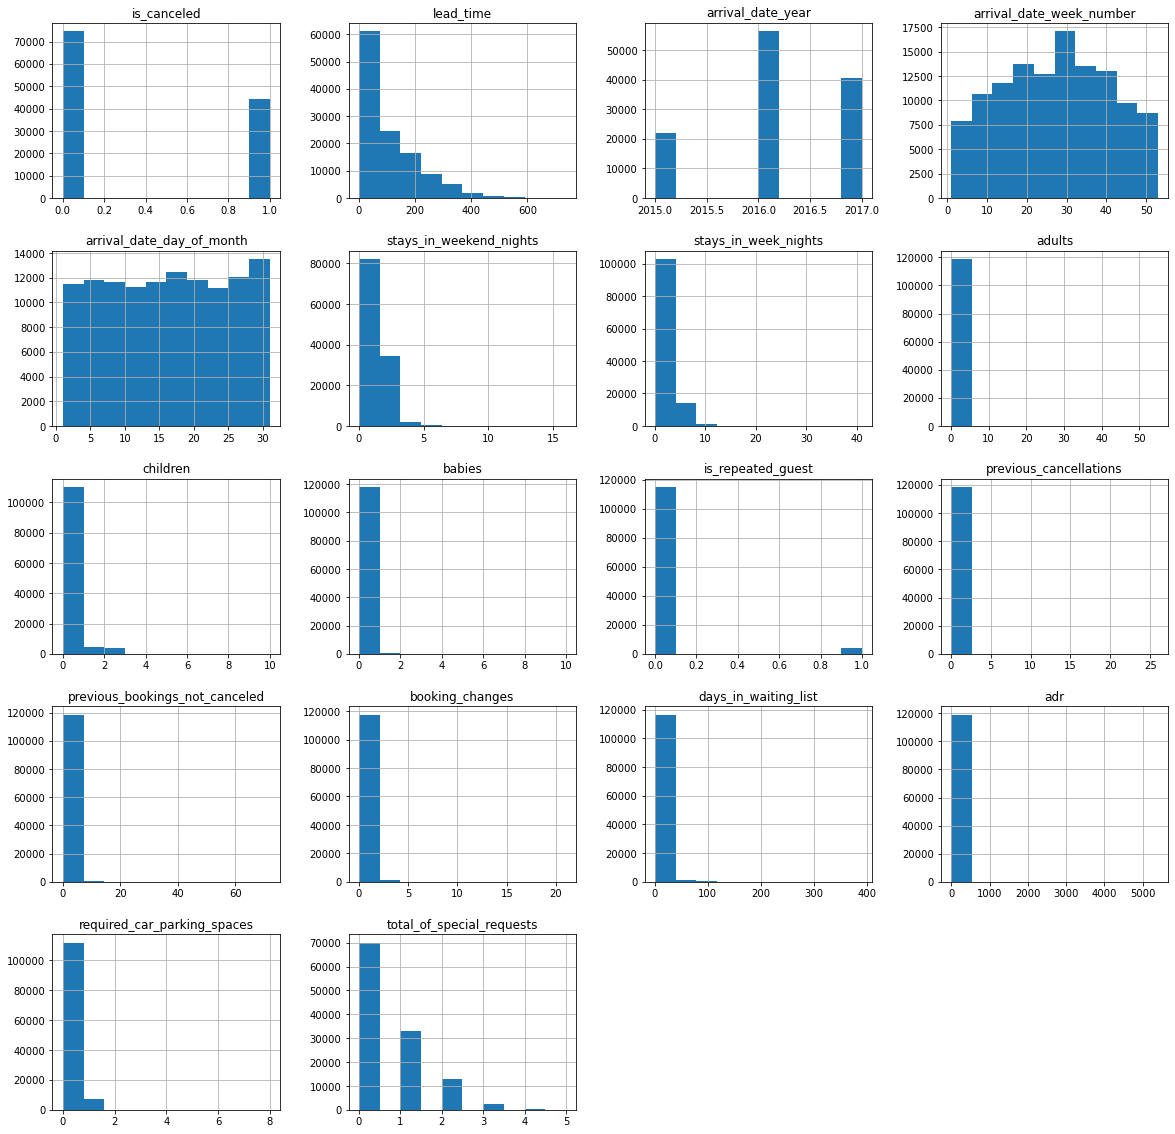

In [26]:
df.hist(figsize=(20,20))
plt.show()

Looks like there are some reservation with 0 adults, we need to take a look at those records.

In [29]:
len(df[(df['adults']==0) & (df['children']==0) & (df['babies']==0)])

170

Now we want delete the zero values

In [30]:
zero_guests = df[(df['adults']==0) & (df['children']==0) & (df['babies']==0)].index
df.drop(zero_guests, inplace=True)
df.shape

(118728, 29)

Now the EDA

which hotel has more cancelations?

In [31]:
print('There are ' + str(len(df[(df['hotel']=='Resort Hotel') & (df['is_canceled']==1)])) + ' cancelations at Resort Hotel')
print('There are ' + str(len(df[(df['hotel']=='City Hotel') & (df['is_canceled']==1)])) + ' cancelations at City Hotel')

There are 11077 cancelations at Resort Hotel
There are 33061 cancelations at City Hotel


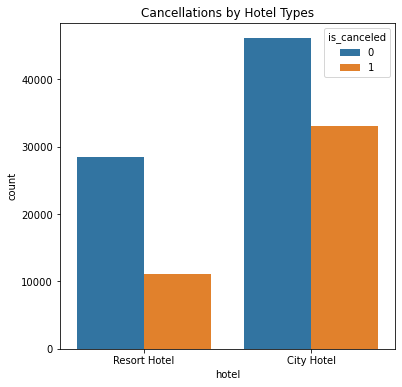

In [32]:
plt.figure(figsize=(6,6))
plt.title(label='Cancellations by Hotel Types')
sns.countplot(x='hotel',hue='is_canceled',data=df)
plt.show()

In [33]:
# % of cancellations in Resort Hotel
df[df['hotel']=='Resort Hotel']['is_canceled'].value_counts(normalize=True)

0    0.720172
1    0.279828
Name: is_canceled, dtype: float64

In [34]:
# % of cancellations in City Hotel
df[df['hotel']=='City Hotel']['is_canceled'].value_counts(normalize=True)

0    0.582262
1    0.417738
Name: is_canceled, dtype: float64

City hotel has a higher cancellations rate of almost 42% comparing Resort hotels almost 28%

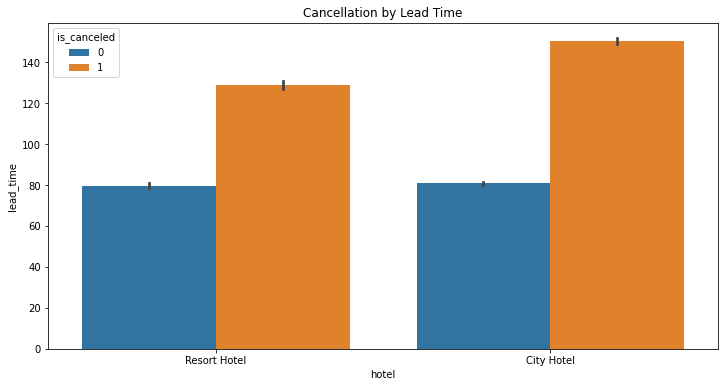

In [35]:
plt.figure(figsize=(12,6))
plt.title(label='Cancellation by Lead Time')
sns.barplot(x='hotel',y='lead_time',hue='is_canceled',data=df)
plt.show()

Looks! like the longer the lead time, the reservation is more likely to be canceled

How about ADR ! 


ADR = Average Daily Rate 

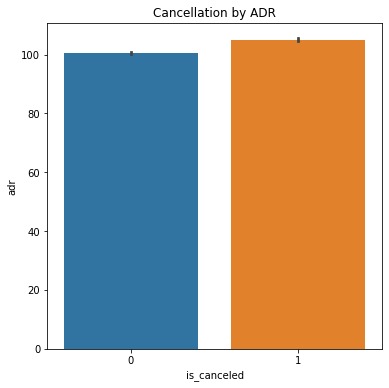

In [36]:
plt.figure(figsize=(6,6))
plt.title(label='Cancellation by ADR')
sns.barplot(x='is_canceled',y='adr',data=df)
plt.show()

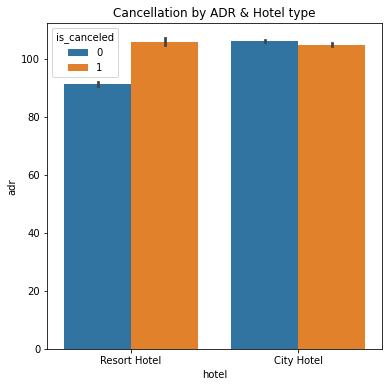

In [39]:
plt.figure(figsize=(6,6))
plt.title(label='Cancellation by ADR & Hotel type')
sns.barplot(x='hotel',y='adr',hue='is_canceled',data=df)
plt.show()

Looks ! like the cancellations in Resort hotels had a higher ADR

would Deposit type makes a difference?

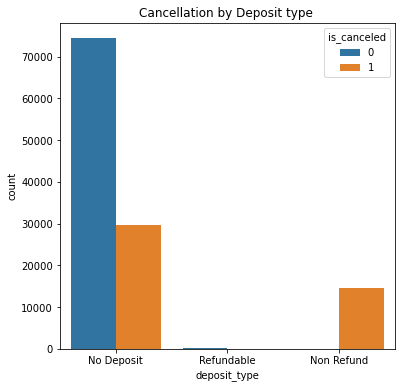

In [41]:
plt.figure(figsize=(6,6))
plt.title(label='Cancellation by Deposit type ')
sns.countplot(x='deposit_type',hue='is_canceled',data=df)
plt.show()

Reservations with No-deposit or Non-refund policy are more likely to be canceled

Any difference in market segments?

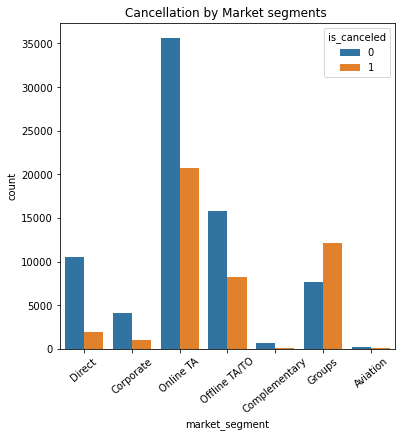

In [43]:
plt.figure(figsize=(6,6))
plt.title(label='Cancellation by Market segments ')
plt.xticks(rotation=40)
sns.countplot(x='market_segment',hue='is_canceled',data=df)
plt.show()

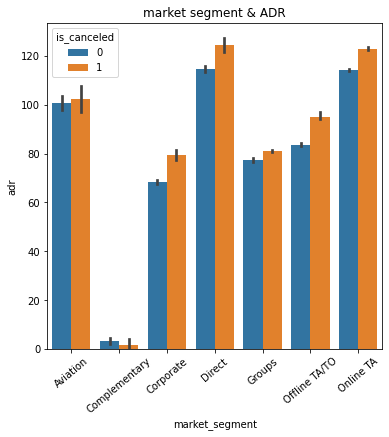

In [88]:
plt.figure(figsize=(6,6))
plt.title(label='market segment & ADR')
plt.xticks(rotation=40)
sns.barplot(x='market_segment',y='adr',hue='is_canceled',data=df)
plt.show()

• The cancellation percentage of groups is higher than other segments

• The cancellation number of Online TA is higher than other segments

• Almost all canceled reservations have a higher ADR.

TA = Travel Agents
,TO = Tour Operators

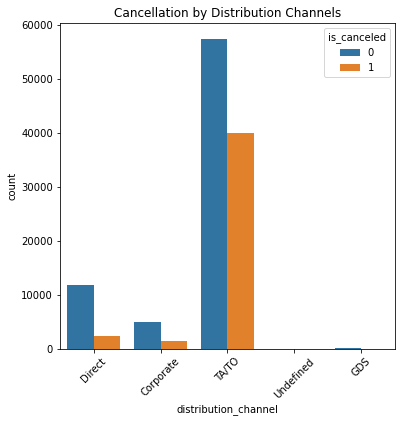

In [51]:
# Distribution Channels
plt.figure(figsize=(6,6))
plt.title(label='Cancellation by Distribution Channels')
plt.xticks(rotation=45) 
sns.countplot(x='distribution_channel',hue='is_canceled',data=df)
plt.show()

In [58]:
#Cancellations by Month, Day and Week Number
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], format='%Y-%m-%d')

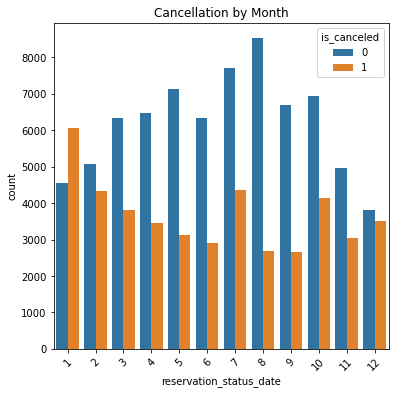

In [59]:
plt.figure(figsize=(6,6))
plt.title(label='Cancellation by Month')
plt.xticks(rotation=45) 
sns.countplot(x=df['reservation_status_date'].dt.month,hue='is_canceled',data=df)
plt.show()

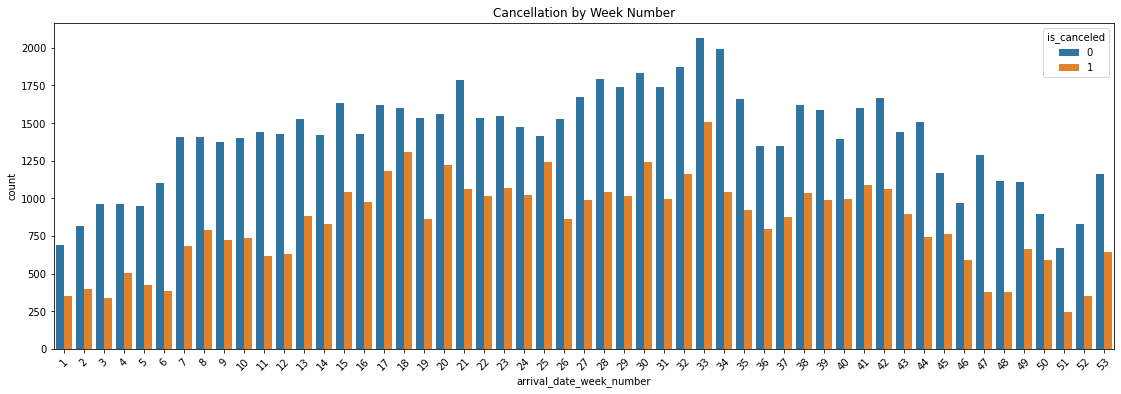

In [60]:
plt.figure(figsize=(19,6))
plt.title(label='Cancellation by Week Number')
plt.xticks(rotation=45) 
sns.countplot(x=df['arrival_date_week_number'],hue='is_canceled',data=df)
plt.show()

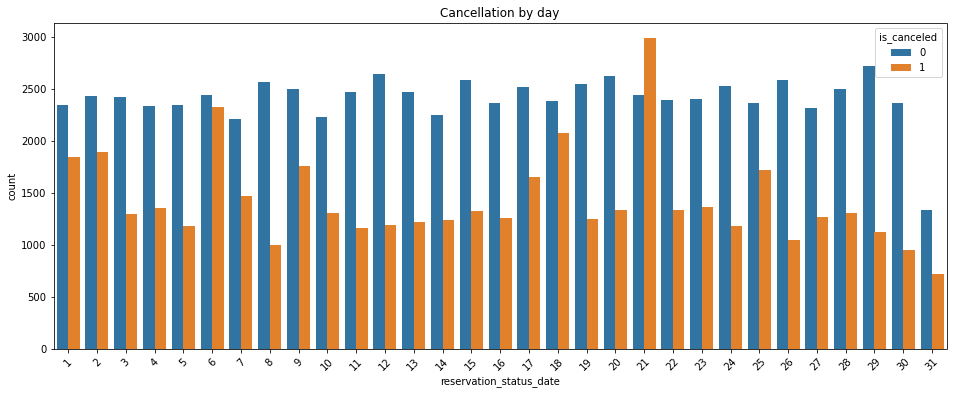

In [61]:
plt.figure(figsize=(16,6))
plt.title(label='Cancellation by day')
plt.xticks(rotation=45) 
sns.countplot(x=df['reservation_status_date'].dt.day,hue='is_canceled',data=df)
plt.show()

Now the modeling

In [65]:
cat_cols=['is_canceled','arrival_date_month','meal','market_segment','distribution_channel','reserved_room_type',
      'is_repeated_guest','deposit_type','customer_type']
df[cat_cols]=df[cat_cols].astype('category')
num_cols = ['lead_time','arrival_date_week_number','arrival_date_day_of_month','stays_in_weekend_nights','stays_in_week_nights',
        'adults','children','babies','previous_cancellations','previous_bookings_not_canceled','required_car_parking_spaces',
        'total_of_special_requests','adr']

In [66]:
model_df = df[cat_cols+num_cols]
model_df.shape

(118728, 22)

In [67]:
model_df.corr()

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,required_car_parking_spaces,total_of_special_requests,adr
lead_time,1.000000,0.126875,0.002402,0.084327,0.165913,0.115020,-0.038580,-0.021231,0.085949,-0.071164,-0.115707,-0.096710,-0.068174
arrival_date_week_number,0.126875,1.000000,0.066577,0.018086,0.015531,0.025956,0.005527,0.010058,0.035354,-0.020876,0.001770,0.025810,0.075699
arrival_date_day_of_month,0.002402,0.066577,1.000000,-0.015739,-0.027723,-0.001884,0.014570,-0.000541,-0.027024,0.000116,0.008158,0.003078,0.030053
stays_in_weekend_nights,0.084327,0.018086,-0.015739,1.000000,0.490100,0.093397,0.045780,0.018523,-0.012998,-0.040727,-0.018099,0.072146,0.048701
stays_in_week_nights,0.165913,0.015531,-0.027723,0.490100,1.000000,0.095399,0.044723,0.020343,-0.014252,-0.047478,-0.024431,0.067360,0.065344
adults,0.115020,0.025956,-0.001884,0.093397,0.095399,1.000000,0.028603,0.017642,-0.007278,-0.105795,0.016107,0.122418,0.221413
children,-0.038580,0.005527,0.014570,0.045780,0.044723,0.028603,1.000000,0.024101,-0.024775,-0.020368,0.057059,0.081811,0.325228
babies,-0.021231,0.010058,-0.000541,0.018523,0.020343,0.017642,0.024101,1.000000,-0.007496,-0.006306,0.036979,0.097654,0.028455
previous_cancellations,0.085949,0.035354,-0.027024,-0.012998,-0.014252,-0.007278,-0.024775,-0.007496,1.000000,0.154127,-0.018500,-0.048681,-0.066233
previous_bookings_not_canceled,-0.071164,-0.020876,0.000116,-0.040727,-0.047478,-0.105795,-0.020368,-0.006306,0.154127,1.000000,0.046798,0.037551,-0.069786


In [69]:
# I want create dummy variabels 

df_dummies = pd.get_dummies(model_df.drop(columns=['is_canceled']))

In [72]:
df_dummies.head()

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,...,reserved_room_type_L,is_repeated_guest_0,is_repeated_guest_1,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,342,27,1,0,0,2,0.0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
1,737,27,1,0,0,2,0.0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2,7,27,1,0,1,1,0.0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
3,13,27,1,0,1,1,0.0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
4,14,27,1,0,2,2,0.0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [78]:
y = model_df['is_canceled']
X = df_dummies

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [82]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)
sc = StandardScaler()

sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [93]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_std, y_train)
y_lr_pred = lr.predict(X_test_std)

print('Accuracy: %.4f' % accuracy_score(y_test, y_lr_pred))
print(confusion_matrix(y_test, y_lr_pred))
print(classification_report(y_test,y_lr_pred))

Accuracy: 0.8045
[[20876  1437]
 [ 5528  7778]]
              precision    recall  f1-score   support

           0       0.79      0.94      0.86     22313
           1       0.84      0.58      0.69     13306

    accuracy                           0.80     35619
   macro avg       0.82      0.76      0.77     35619
weighted avg       0.81      0.80      0.79     35619



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
